In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import fonctions as fct
import math
import smtplib
from datetime import datetime

In [42]:
data_init = pd.read_csv('Projet1/CAC40.csv')
Date = data_init.index

data_init.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-01,3634.610107,3674.959961,3620.639893,3669.290039,3669.290039,176499800.0
1,2010-12-02,3695.409912,3754.820068,3650.030029,3747.040039,3747.040039,186177800.0
2,2010-12-03,3744.239990,3775.750000,3721.379883,3750.550049,3750.550049,151577200.0
3,2010-12-06,3758.580078,3763.399902,3723.159912,3749.229980,3749.229980,110872600.0
4,2010-12-07,3759.590088,3835.060059,3758.909912,3810.500000,3810.500000,143962000.0


In [43]:
data_init.shape

(3071, 7)

In [44]:
## On crée une fonction qui cherche les NaN

In [45]:
#partie ajouter pour classer les valeurs nulles des colonnes de differents tables avec leurs pourcentage
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total NaN Values', 'Percentage of NaN Values'])

In [46]:
missing_data(data_init)

,Total NaN Values,Percentage of NaN Values
Open,3,0.097688
High,3,0.097688
Low,3,0.097688
Close,3,0.097688
Adj Close,3,0.097688
Volume,3,0.097688
Date,0,0.000000


In [47]:
#permet de classer le fichier par une colonne spécifique et de mettre à jour l'index
data_ordered=data_init.sort_values(by=['Date'],ignore_index=True)

In [48]:
data_ordered.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-01,3634.610107,3674.959961,3620.639893,3669.290039,3669.290039,176499800.0
1,2010-12-02,3695.409912,3754.820068,3650.030029,3747.040039,3747.040039,186177800.0
2,2010-12-03,3744.239990,3775.750000,3721.379883,3750.550049,3750.550049,151577200.0
3,2010-12-06,3758.580078,3763.399902,3723.159912,3749.229980,3749.229980,110872600.0
4,2010-12-07,3759.590088,3835.060059,3758.909912,3810.500000,3810.500000,143962000.0


# recherche des NaN

In [49]:
indices_open = np.where(data_ordered.Open.isnull())[0].tolist()
indices_open

[278, 870, 2317]

In [50]:
indices_close = np.where(data_ordered.Close.isnull())[0].tolist()
indices_close

[278, 870, 2317]

In [51]:
data_ordered[865:875]

,Date,Open,High,Low,Close,Adj Close,Volume
865,2014-04-24,4474.319824,4499.319824,4440.629883,4479.540039,4479.540039,143874900.0
866,2014-04-25,4459.169922,4473.479980,4431.379883,4443.629883,4443.629883,95383500.0
867,2014-04-28,4455.049805,4477.620117,4444.459961,4460.529785,4460.529785,90359100.0
868,2014-04-29,4463.600098,4504.140137,4449.939941,4497.680176,4497.680176,119189200.0
869,2014-04-30,4473.939941,4491.290039,4470.750000,4487.390137,4487.390137,137774800.0
870,2014-05-01,NaN,NaN,NaN,NaN,NaN,NaN
871,2014-05-02,4473.830078,4485.100098,4447.439941,4458.169922,4458.169922,117261200.0
872,2014-05-05,4453.520020,4467.370117,4400.910156,4462.689941,4462.689941,83750800.0
873,2014-05-06,4474.910156,4477.859863,4420.709961,4428.069824,4428.069824,125181200.0
874,2014-05-07,4414.339844,4453.220215,4402.779785,4446.439941,4446.439941,134882300.0


In [52]:
data_ordered[273:283]

,Date,Open,High,Low,Close,Adj Close,Volume
273,2011-12-23,3101.750000,3113.939941,3086.100098,3102.090088,3102.090088,57720200.0
274,2011-12-27,3111.139893,3131.500000,3098.139893,3103.110107,3103.110107,40091200.0
275,2011-12-28,3102.239990,3130.820068,3071.080078,3071.080078,3071.080078,60153000.0
276,2011-12-29,3081.169922,3127.560059,3064.689941,3127.560059,3127.560059,68204400.0
277,2011-12-30,3139.909912,3159.810059,3120.050049,3159.810059,3159.810059,61300800.0
278,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
279,2012-01-03,3231.429932,3246.739990,3193.629883,3245.399902,3245.399902,123415200.0
280,2012-01-04,3227.459961,3242.840088,3186.479980,3193.649902,3193.649902,114040800.0
281,2012-01-05,3197.159912,3200.149902,3136.750000,3144.909912,3144.909912,121161600.0
282,2012-01-06,3156.419922,3184.379883,3122.629883,3137.360107,3137.360107,104492800.0


In [53]:
data_ordered[2310:2323]

,Date,Open,High,Low,Close,Adj Close,Volume
2310,2019-12-16,5946.649902,6003.379883,5942.299805,5991.660156,5991.660156,77242800.0
2311,2019-12-17,5989.479980,5989.479980,5955.359863,5968.259766,5968.259766,84477400.0
2312,2019-12-18,5971.399902,5983.020020,5959.600098,5959.600098,5959.600098,80799300.0
2313,2019-12-19,5963.870117,5972.279785,5942.879883,5972.279785,5972.279785,72322800.0
2314,2019-12-20,5979.529785,6024.169922,5966.879883,6021.529785,6021.529785,151362500.0
2315,2019-12-23,6013.560059,6035.950195,6005.959961,6029.370117,6029.370117,46603900.0
2316,2019-12-24,6027.189941,6033.990234,6025.620117,6029.549805,6029.549805,12440900.0
2317,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2318,2019-12-27,6039.950195,6065.000000,6027.720215,6037.390137,6037.390137,47289800.0
2319,2019-12-30,6028.959961,6037.700195,5982.220215,5982.220215,5982.220215,40318700.0


In [54]:
### On va corriger ça en attribuant les valeurs de la fermeture de la veille aux NaN
#fonction qui permet de mettre la valeur precedente dans un case vide
def add_before_value(data,ind_col,col):
    for j in ind_col:
        data.loc[j,col] =data.loc[j-1,col]
    return data

In [55]:
data_ordered_comp = add_before_value(data_ordered,indices_close,'Close')

In [56]:
data_ordered_comp.loc[2310:2323]

,Date,Open,High,Low,Close,Adj Close,Volume
2310,2019-12-16,5946.649902,6003.379883,5942.299805,5991.660156,5991.660156,77242800.0
2311,2019-12-17,5989.479980,5989.479980,5955.359863,5968.259766,5968.259766,84477400.0
2312,2019-12-18,5971.399902,5983.020020,5959.600098,5959.600098,5959.600098,80799300.0
2313,2019-12-19,5963.870117,5972.279785,5942.879883,5972.279785,5972.279785,72322800.0
2314,2019-12-20,5979.529785,6024.169922,5966.879883,6021.529785,6021.529785,151362500.0
2315,2019-12-23,6013.560059,6035.950195,6005.959961,6029.370117,6029.370117,46603900.0
2316,2019-12-24,6027.189941,6033.990234,6025.620117,6029.549805,6029.549805,12440900.0
2317,2019-12-25,NaN,NaN,NaN,6029.549805,NaN,NaN
2318,2019-12-27,6039.950195,6065.000000,6027.720215,6037.390137,6037.390137,47289800.0
2319,2019-12-30,6028.959961,6037.700195,5982.220215,5982.220215,5982.220215,40318700.0


In [57]:
#drop des colonnes non retenues par la stratégie
for col in data_ordered.columns:
    if np.where(data_ordered_comp[str(col)].isnull())[0].shape[0] != 0:
        data_ordered_comp = data_ordered_comp.drop(columns=col)
        print(col)

Open
High
Low
Adj Close
Volume


In [58]:
data_ordered_comp.head()

,Date,Close
0,2010-12-01,3669.290039
1,2010-12-02,3747.040039
2,2010-12-03,3750.550049
3,2010-12-06,3749.229980
4,2010-12-07,3810.500000


In [59]:
data_finale = pd.DataFrame (data_ordered_comp).set_index('Date')
data_finale.head()

,Close
Date,
2010-12-01,3669.290039
2010-12-02,3747.040039
2010-12-03,3750.550049
2010-12-06,3749.229980
2010-12-07,3810.500000


In [60]:
missing_data(data_finale)

,Total NaN Values,Percentage of NaN Values
Close,0,0.0


# Recherche des valeurs abbérantes par la méthode du box plot :

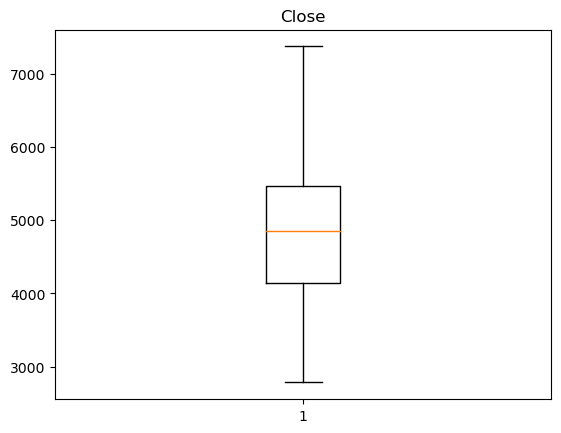

In [61]:
#recherche des valeurs aberrantes
fig1, ax1 = plt.subplots()
ax1.set_title('Close')
ax1.boxplot(data_finale['Close'])
plt.show()


## Visualisation de la série

la série a une tendance haussière bien vrai qu'on observe une chute entre 2019 et 2020, ceci pourrait s'expliquer par la crise du covid 19 qu'il y a eu en cette periode

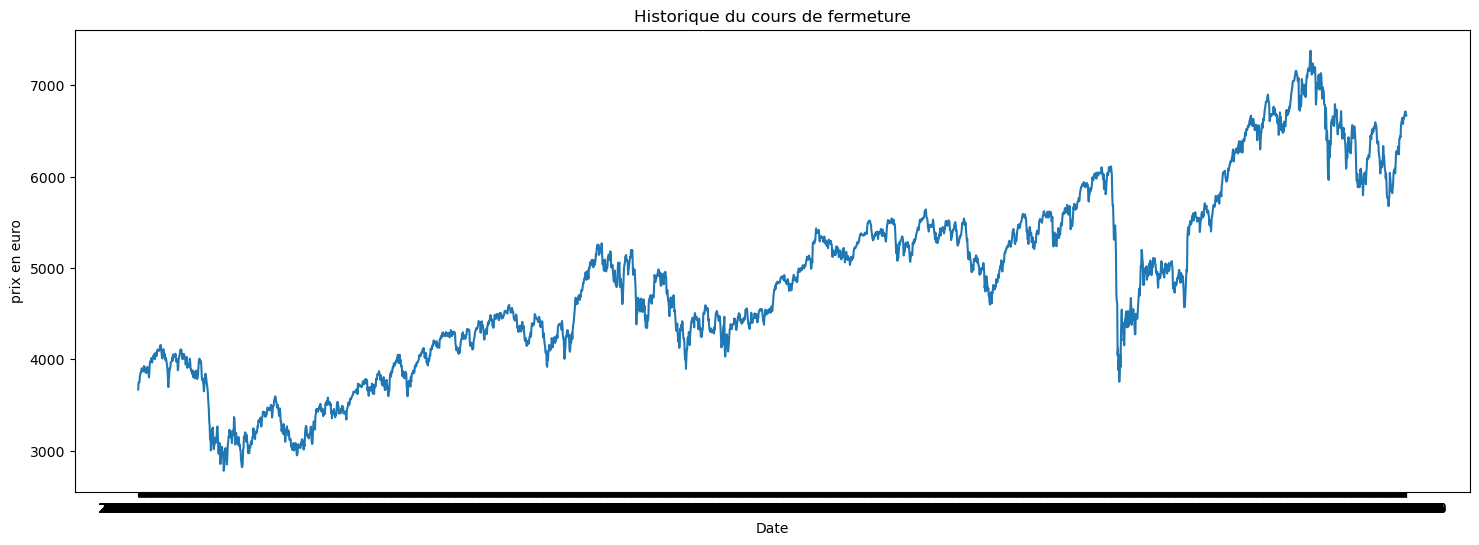

In [105]:

plt.figure(figsize=(18,6))
plt.title('Historique du cours de fermeture')
plt.plot(data_finale.index, data_finale)
plt.xlabel('Date')
plt.ylabel('prix en euro')
plt.show()

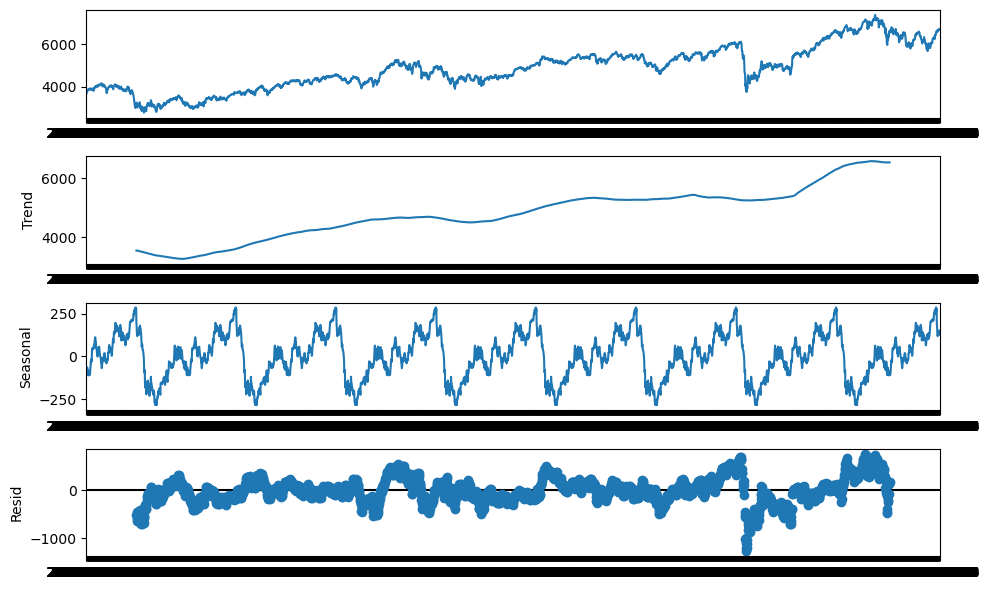

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data_finale, period=360)
fig = decomp.plot()
fig.set_size_inches((10, 6))
fig.tight_layout()
plt.show()

# Prevision de la série à l'aide d'un modèle ARIMA

l'application d'un modèle arima impose une serie stationnaire, ainsi etudions la sattionnarité de la série étudiée

## Etude de la stationnarité

ACF est une fonction d’auto-corrélation qui nous donne des valeurs d’auto-corrélation de toute série avec ses valeurs décalées. En d’autres termes, elle décrit comment la valeur actuelle de la série est liée à ses valeurs passées.
Si la série chronologique est stationnaire, les tracés ACF/PACF afficheront une coupure rapide après un petit nombre de décalages 

In [64]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/opt/mamba/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


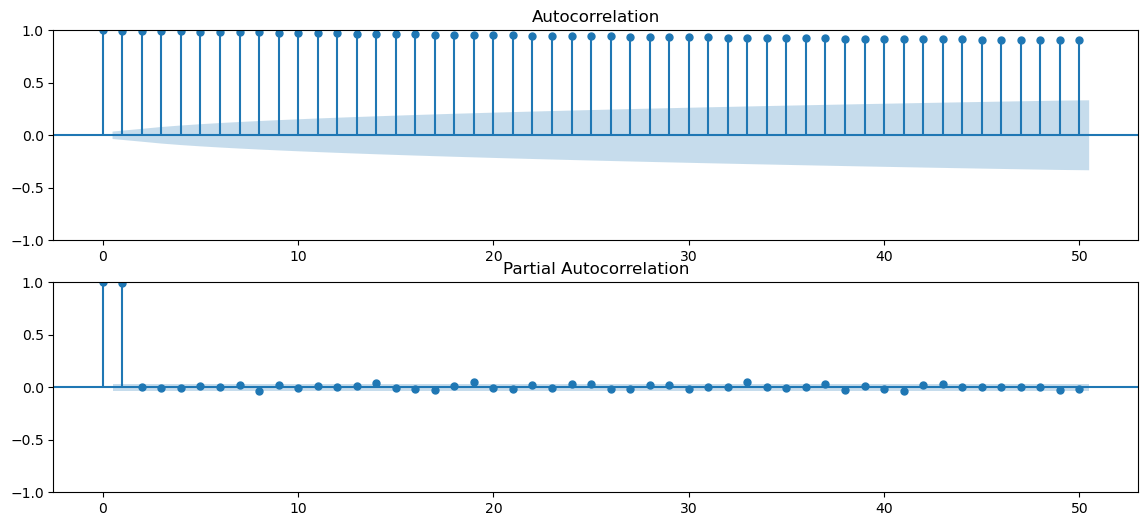

In [119]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(data_finale, lags=50, ax=ax1)
ax2 = plot_pacf(data_finale, lags=50, ax=ax2)
plt.show()

Nous ne voyons pas ce phénomène ici, donc nous avons une certaine intuition que cette série n’est pas stationnaire.

### test stationnarité

In [124]:
#Le test Dickey-Fuller 
result = adfuller(data_finale)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.344646
p-value: 0.608507
Critical Test Statistics Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


On ne rejette pas l'hypothèse nulle de non stationnarité, ainsi la serie est non stationnaire

## Différentiation

Par ailleurs, on a déjà identifié la saisonnalité de nos observations qui est annuelle. On peut déjà effectuer une différenciation en appliquant l'opérateur (1−L12).

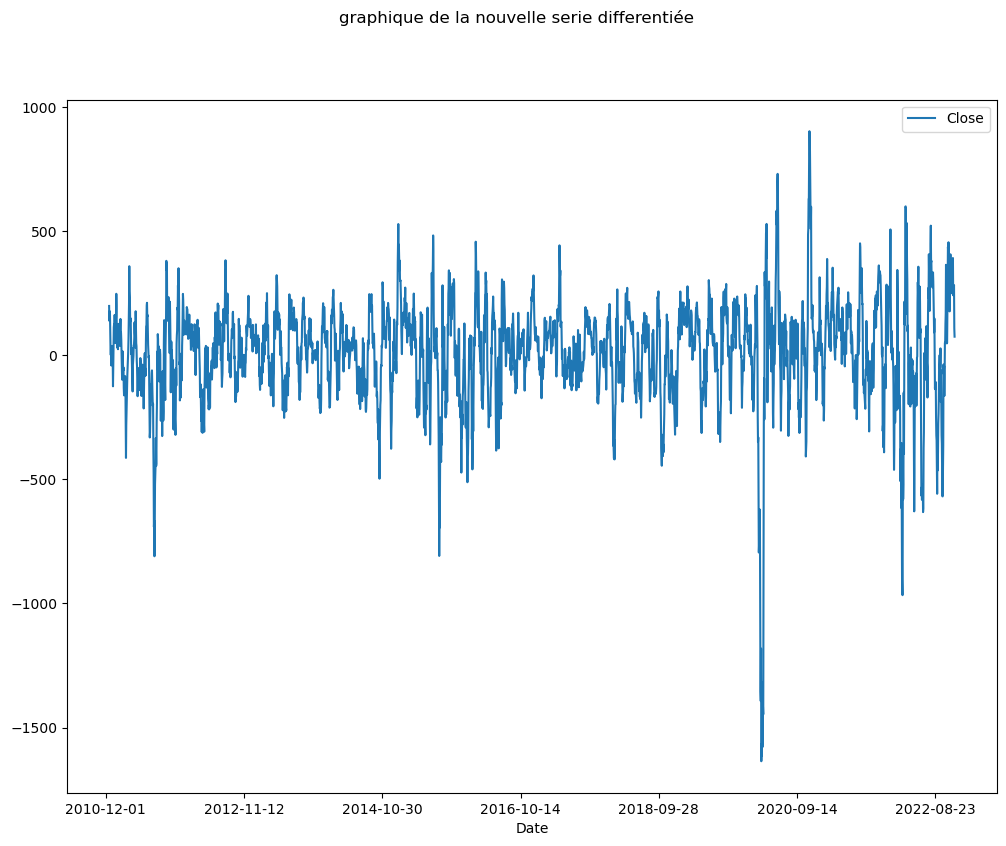

In [133]:
data_finale_diff_12 = data_finale - data_finale.shift(12)

fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle('graphique de la nouvelle serie differentiée')
data_finale_diff_12.plot(ax=ax)
plt.show()

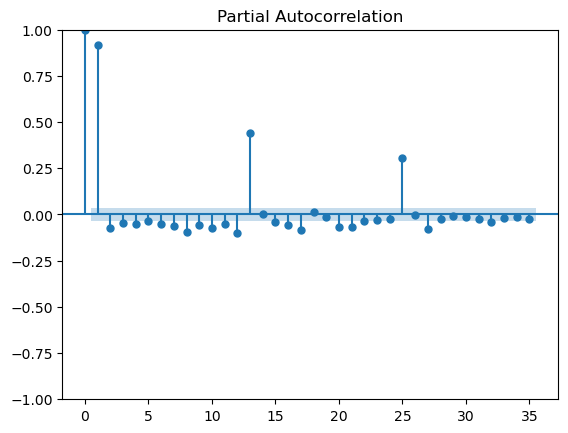

<Figure size 1800x600 with 0 Axes>

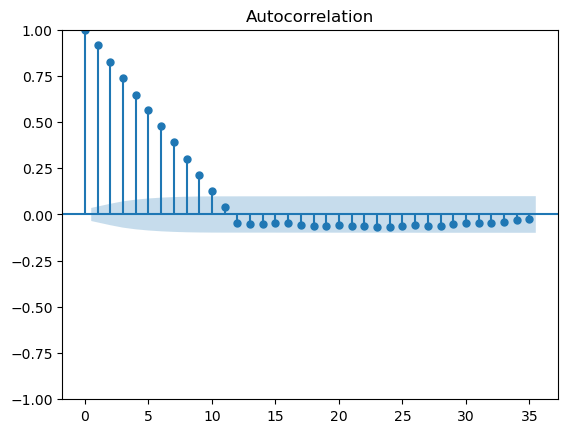

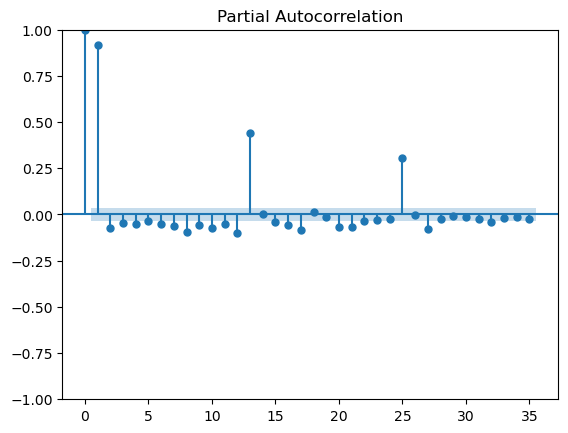

In [134]:

plt.figure(figsize=(18,6))
plot_acf(data_finale_diff_12[12:])
plot_pacf(data_finale_diff_12[12:])


La sortie ACF présente bien une décroissance lente vers 0, ce qui traduit la non-stationnarité. On effectue donc une différenciation en appliquant cette fois l'opérateur (1−L). 

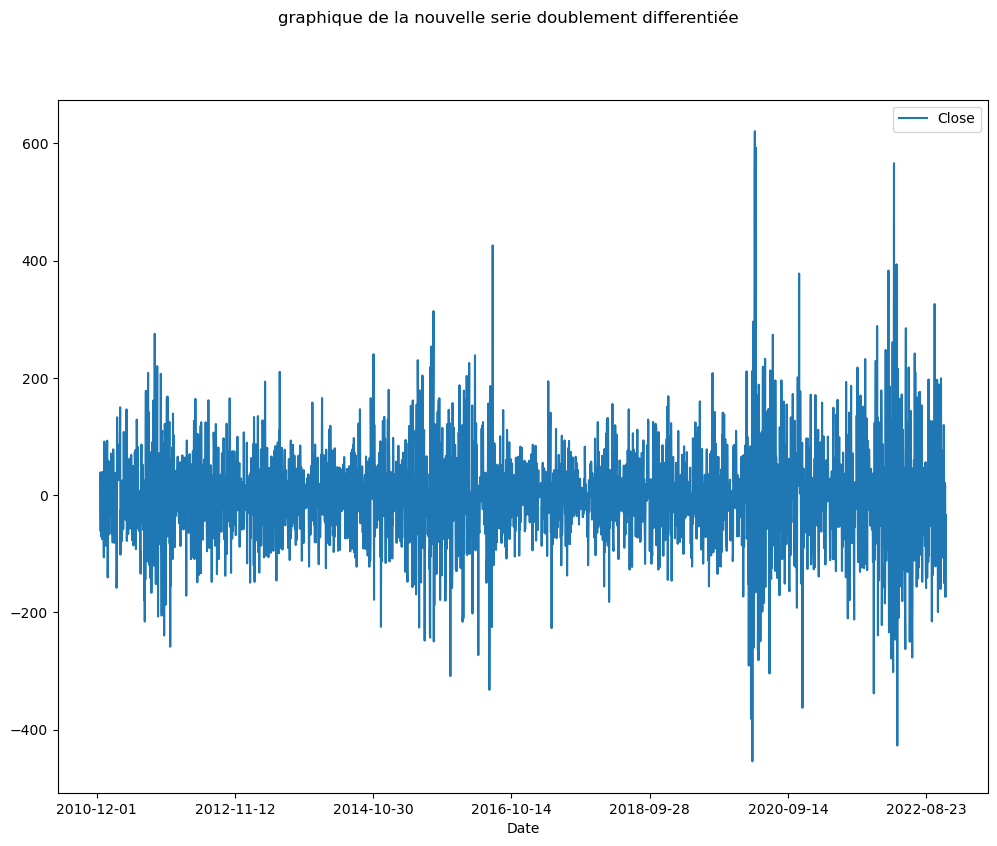

In [135]:
data_finale_diff_12_1 = data_finale_diff_12 - data_finale_diff_12.shift(1)

fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle('graphique de la nouvelle serie doublement differentiée')
data_finale_diff_12_1.plot(ax=ax)
plt.show()

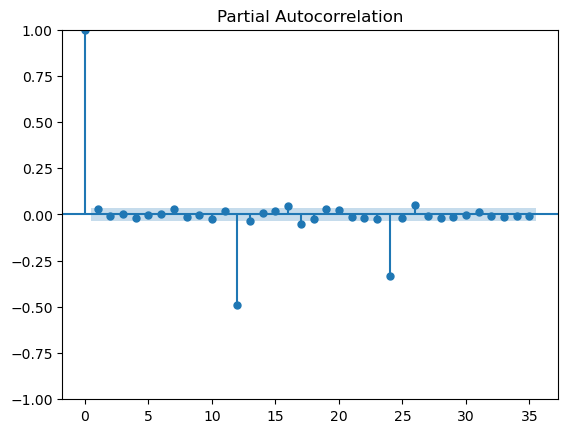

<Figure size 1800x600 with 0 Axes>

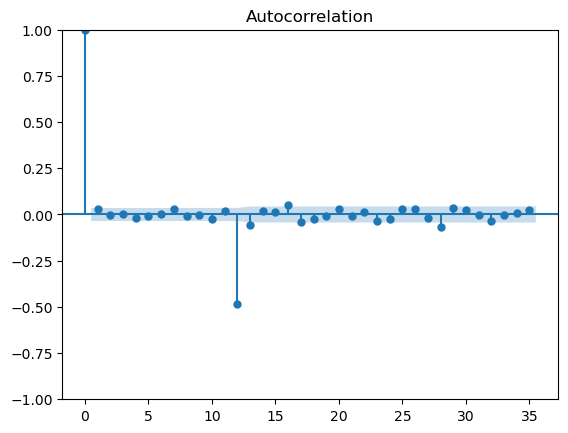

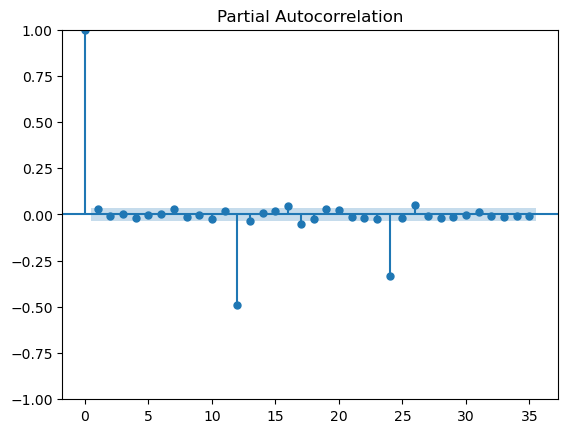

In [132]:

plt.figure(figsize=(18,6))
plot_acf(data_finale_diff_12_1[13:])
plot_pacf(data_finale_diff_12_1[13:],method='ywm')

Avec cette double différenciation, on s'approche d'un autocorrélogramme simple empirique, suggérant une série dorénavant stationnaire

In [136]:
#Le test Dickey-Fuller 
result = adfuller(data_finale_diff_12_1[13:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.055443
p-value: 0.000000
Critical Test Statistics Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


le test confirme la stationnaritéde la serie au seuil de 1 et 5%

## Identification, estimation et validation du modèle

La fonction auto_arima de Pmdarima est extrêmement utile lors de la construction d'un modèle ARIMA car elle nous aide à identifier les paramètres p,d,q les plus optimaux et à renvoyer un modèle ARIMA ajusté. Utilisons-la pour extraire automatiquement les meilleurs paramètres pour notre modèle ARIMA saisonnier en minimisant le critère AIC.

À l'intérieur de la fonction auto_arima, nous spécifierons d=1 et D=1 car nous différencions une fois pour la tendance et une fois pour la saisonnalité, et trend='C'pour inclure la constante et seasonal=True pour ajuster un ARIMA saisonnier.



In [137]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
import pmdarima as pm

In [139]:
model = pm.auto_arima(data_finale, d=1, D=1,seasonal=True, m=12, trend='c',start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=11.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=35805.863, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=34986.162, Time=6.97 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=16.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=35805.440, Time=0.36 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=34617.291, Time=43.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=71.92 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=10.43 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=34615.397, Time=28.89 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=34985.279, Time=3.92 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=56.50 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=34617.291, Time=43.82 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=34619.267, Time=64.05 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=34615.397, Time=32.99 sec

Best model:  ARIMA(0,1,0

La fonction auto_arima nous indique que le meilleur modèle approprié à nos données est ARIMA(0,1,0)(2,1,0)[12]. Pour ce dernier modèle, tous les coefficients sont significatifs. 

Nous separons l'ensemble du jeu de données en donnnées d'entrainement (85% du jeu de données) et données test (15%)

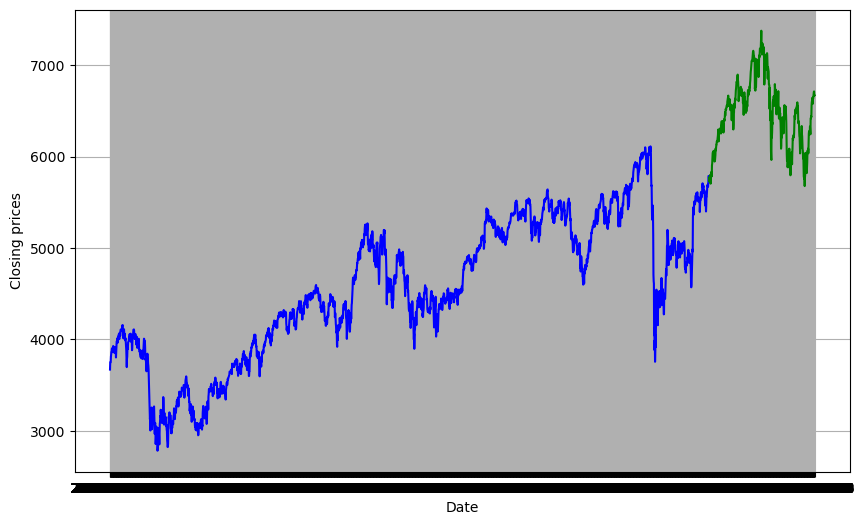

In [104]:
#divide into train and validation set
train = data_finale[:int(0.85*(len(data_finale)))]
test = data_finale[int(0.85*(len(data_finale))):]

#plotting the data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing prices')
plt.plot(train,'blue',label='Train data')
plt.plot(test,'green',label='Test data') 
plt.show()


Appliquons le meilleur modèle arima, ARIMA(0,1,0)(2,1,0)[12] , déterminé précédemment par la fonction auto_arima, à notre jeu d'entrainement. Nous utilisons pour ce faire, la fonction SARIMAX de la librairie statsmodel. 

In [140]:
import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [141]:
model = SARIMAX(train ,order=(0,1,0),seasonal_order=(2,1,0,12))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56189D+00    |proj g|=  1.45985D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   7.240D-05   5.562D+00
  F =   5.5618837917362107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Results of SARIMAX on train
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2610
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -14516.517
Date:                            Wed, 21 Dec 2022   AIC                          29039.033
Time:                          

A partir du résumé ci-dessus, nous pouvons trouver la valeur des coefficients et leur p-value. Remarquons que d'après la valeur p, tous les coefficients sont significatifs.

#### Validation: étude des résidus 

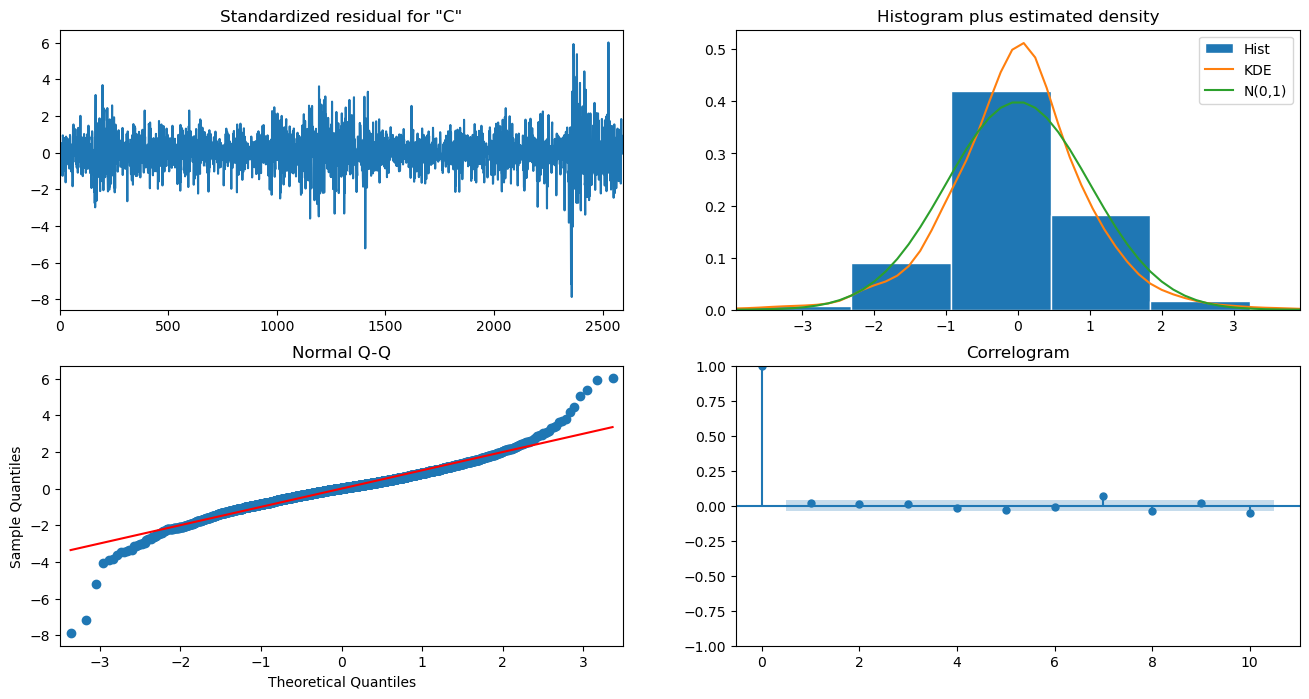

In [142]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

À partir du tracé normal Q-Q, nous pouvons voir que nous avons presque une ligne droite, ce qui suggère qu'il n'y a pas de déviation systématique de la normalité. De plus, le corrélogramme en bas à droite suggère qu'il n'y a pas d'autocorrélation dans les résidus, et qu'ils sont donc effectivement du bruit blanc.
Le premier graphique à gauche montre les résidus dans le temps, nous ne voyons pas de saisonnalité ici. C'est une bonne chose. Le graphique en haut à droite montre que la ligne kde (en rouge) suit à peu près la ligne N(0,1) (distribution normale avec une moyenne de zéro et un écart-type de 1), ce qui confirme que les résidus sont normalement distribués.

Ainsi, nous avons à faire à un bruit blanc fort

Pour mesurer la précision des prévisions, nous comparons les valeurs de prédiction sur l'ensemble de test avec ses valeurs réelles:

/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


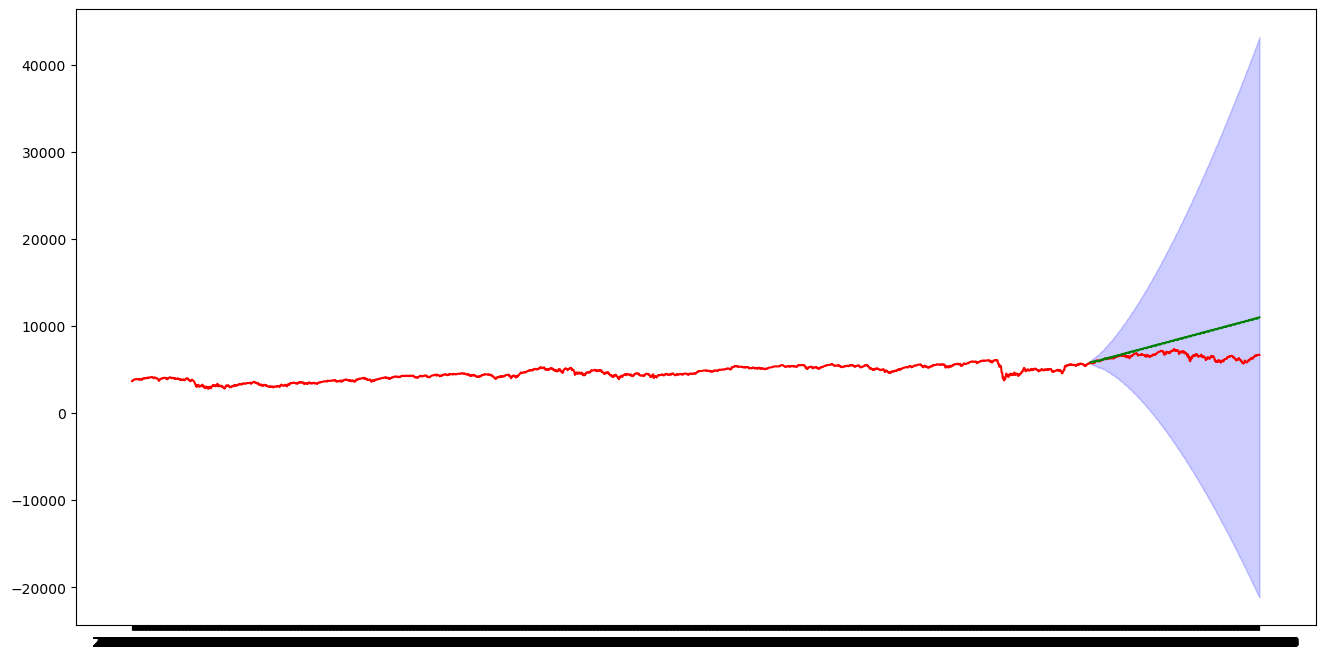

In [167]:
forecast = results.get_forecast(steps=len(test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = mean.index
plt.figure(figsize=(16,8))
# Plot past  levels
plt.plot(data_finale.index, data_finale, label='Original', color = 'red')
# Prediction Mean
plt.plot(d, mean, label='Forecasted', color= 'green')
# Shade of space between  confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1],alpha=0.2, color= 'blue')

la prédiction ne coincide pas avec les valeurs réelles de l'echantillon test, il predit des valeurs superieures au x valeurs réelles

prédiction sur les 24 prochains mois

In [173]:
model1 = SARIMAX(data_finale,order=(0,1,0),seasonal_order=(2,1,0,12))
results1 = model.fit()
print("Results of SARIMAX on train")
print(results1.summary())

/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56189D+00    |proj g|=  1.45985D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   7.240D-05   5.562D+00
  F =   5.5618837917362107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Results of SARIMAX on train
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:      

/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


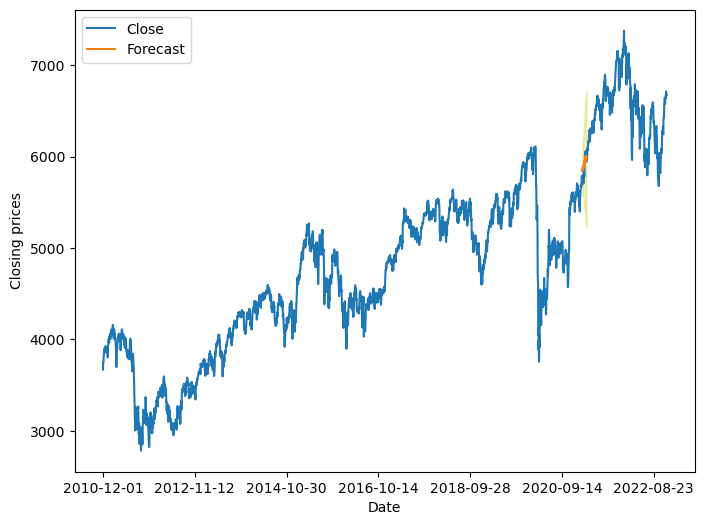

In [180]:
future = results1.get_forecast(steps=24)
ci = future.conf_int()
ax = data_finale.plot(label='Close pr', figsize=(8, 6))
future.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(ci.index,
                ci.iloc[:, 0],
                ci.iloc[:, 1], color='y', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Closing prices')
plt.legend()
plt.show()